In [1]:
#!pip install pymc3 arviz 

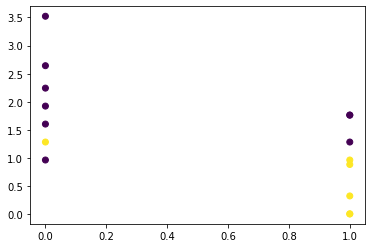

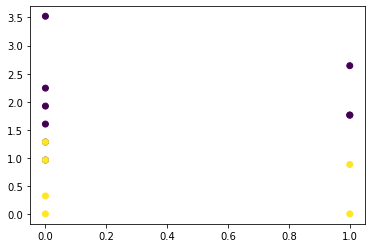

In [2]:
import numpy as np
import pandas as pd
import scipy
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import arviz as az
import pymc3 as pm

product_id = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
offers = np.array([10.0, 10.1, 10.3, 9.6, 10.7, 10.0, 9.9, 10.2, 9.7, 9.9, 20, 21, 19, 20, 18])
status = np.array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1])
region = np.array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1])


df = pd.DataFrame()
df['offers'] = offers
df['product_id'] = product_id
normalized_offers = df.groupby(['product_id']).offers.transform(lambda x : zscore(x, ddof=1))
normalized_offers -= min(normalized_offers) - 0.01



plt.scatter(region, normalized_offers, c=status) 
plt.show()
plt.scatter(product_id, normalized_offers, c=status) 
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  


/opt/conda/lib/python3.7/site-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


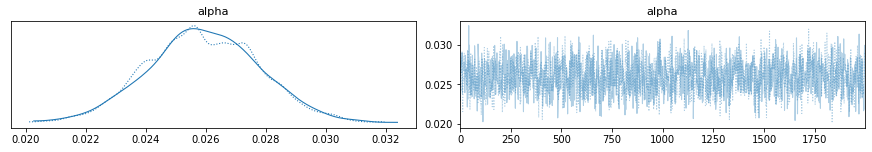

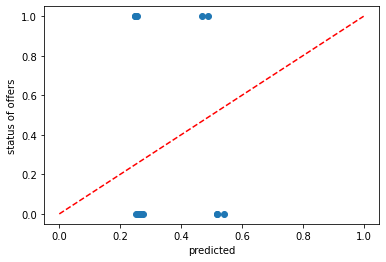

0 0.26850904622185906 -18.290211432116124


In [3]:
i=0

with pm.Model() as m1:
    alpha = pm.Normal('alpha', mu=0, sigma=1)    
    out = pm.Normal('out', mu=alpha * offers, sigma=0.1, observed=status)
    trace = pm.sample(tune=1000, draws=2000, chains=2)
    
az.plot_trace(trace) 
plt.show() 

with m1:
    pp = pm.sample_posterior_predictive(trace)['out'].mean(axis=0)
    
plt.scatter(pp, status)
plt.xlabel('predicted')
plt.ylabel('status of offers')
plt.plot([0,1],[0,1], color='red', linestyle='dashed')
plt.show()

print(i, mean_squared_error(pp, status), r2_score(pp, status))
i+=1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  


/opt/conda/lib/python3.7/site-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


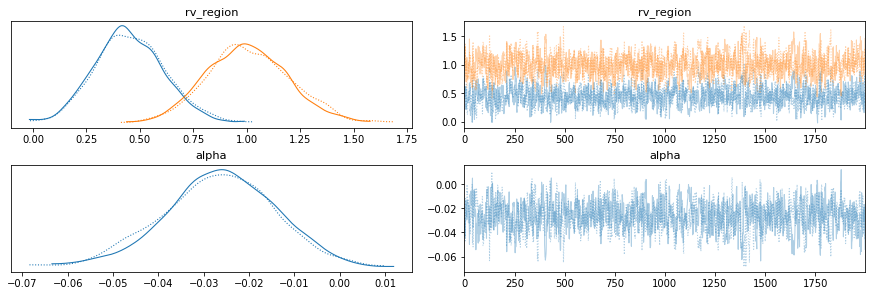

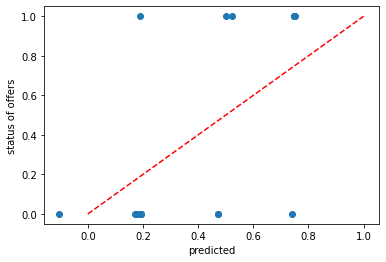

1 0.16604096590677 -1.3686358711736846


In [4]:
with pm.Model() as m2:
    rv_region = pm.Normal('rv_region', mu=0, sigma=1, shape=len(set(region)))
    alpha = pm.Normal('alpha', mu=0, sigma=1)   
    
    out = pm.Normal('out', mu=alpha * offers + rv_region[region], sigma=0.2, observed=status)
    trace = pm.sample(tune=1000, draws=2000, chains=2)
    
az.plot_trace(trace) 
plt.show() 

with m2:
    pp = pm.sample_posterior_predictive(trace)['out'].mean(axis=0)
    
plt.scatter(pp, status)
plt.xlabel('predicted')
plt.ylabel('status of offers')
plt.plot([0,1],[0,1], color='red', linestyle='dashed')
plt.show()
print(i, mean_squared_error(pp, status), r2_score(pp, status))
i+=1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  


/opt/conda/lib/python3.7/site-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


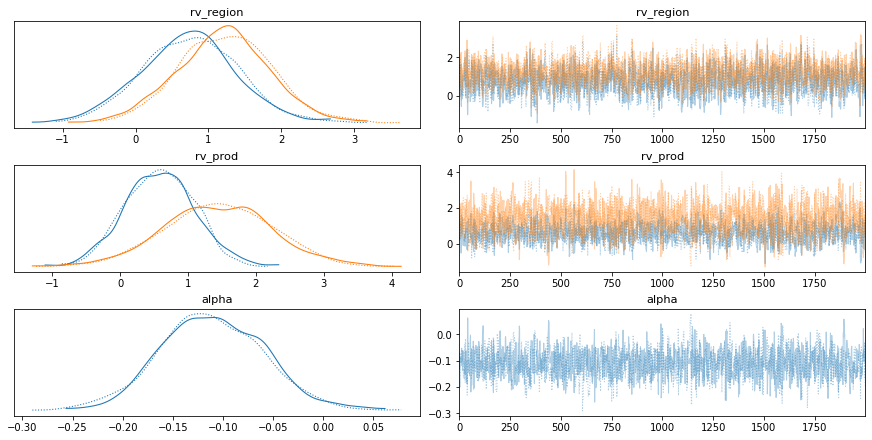

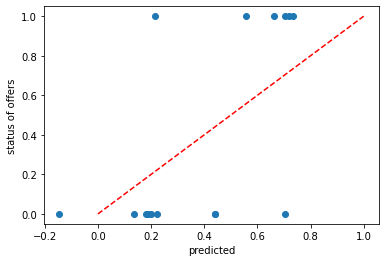

2 0.14956519543414917 -1.1101074825402062


In [5]:
with pm.Model() as m3:
    rv_region = pm.Normal('rv_region', mu=0, sigma=1, shape=len(set(region)))
    rv_prod = pm.Normal('rv_prod', mu=0, sigma=1, shape=len(set(product_id)))
    alpha = pm.Normal('alpha', mu=0, sigma=1)   
    
    out = pm.Normal('out', mu=alpha * offers + rv_region[region] + rv_prod[product_id]
                    , sigma=0.2, observed=status)
    trace = pm.sample(tune=1000, draws=2000, chains=2)
    
az.plot_trace(trace) 
plt.show() 

with m3:
    pp = pm.sample_posterior_predictive(trace)['out'].mean(axis=0)
    
plt.scatter(pp, status)
plt.xlabel('predicted')
plt.ylabel('status of offers')
plt.plot([0,1],[0,1], color='red', linestyle='dashed')
plt.show()
print(i, mean_squared_error(pp, status), r2_score(pp, status))
i+=1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  # Remove the CWD from sys.path while we load stuff.


/opt/conda/lib/python3.7/site-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


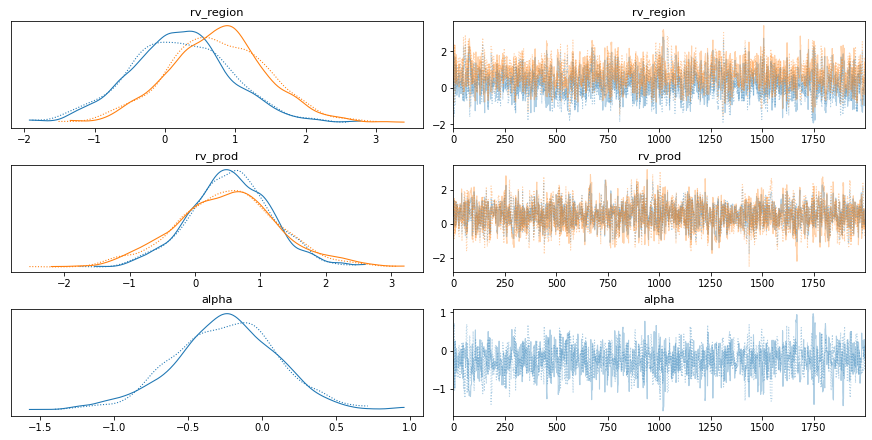

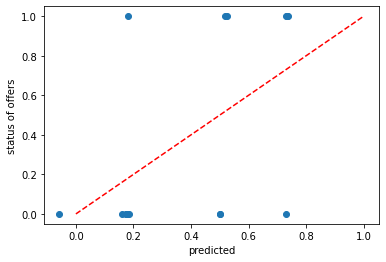

3 0.1687761660454724 -1.5259540487788343


In [6]:
#%% log linear

with pm.Model() as m4:
    rv_region = pm.Normal('rv_region', mu=0, sigma=1, shape=len(set(region)))
    rv_prod = pm.Normal('rv_prod', mu=0, sigma=1, shape=len(set(product_id)))
    alpha = pm.Normal('alpha', mu=0, sigma=1)   
    
    mu = alpha * np.log(offers) +  rv_region[region] + rv_prod[product_id]
    out = pm.Normal('out', mu=mu, sigma=0.2, observed=status)
    trace = pm.sample(tune=1000, draws=2000, chains=2)
    

az.plot_trace(trace) 
plt.show()

with m4:
    pp = pm.sample_posterior_predictive(trace)['out'].mean(axis=0)
    
plt.scatter(pp, status)
plt.xlabel('predicted')
plt.ylabel('status of offers')
plt.plot([0,1],[0,1], color='red', linestyle='dashed')
plt.show() 
print(i, mean_squared_error(pp, status), r2_score(pp, status))
i+=1 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  if sys.path[0] == '':


/opt/conda/lib/python3.7/site-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


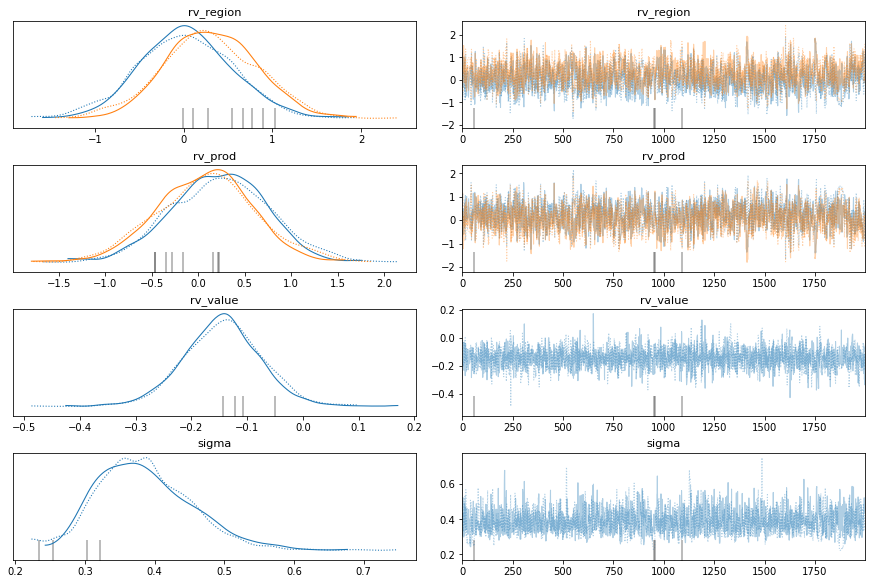

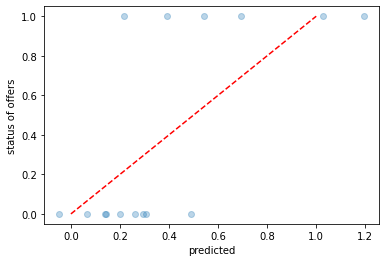

4 0.126789935672528 -0.1203146138007054


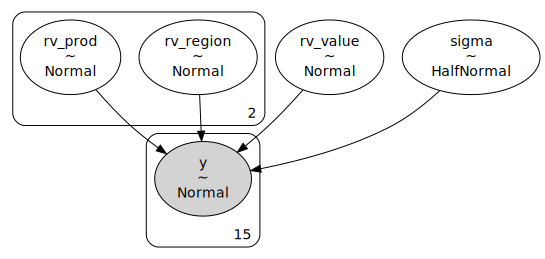

In [7]:
#noise as distribution and normalized offers being used
with pm.Model() as m5:
    rv_region = pm.Normal('rv_region', mu=0, sigma=1, shape=len(set(region)))
    rv_prod = pm.Normal('rv_prod', mu=0, sigma=1, shape=len(set(product_id)))
    rv_value = pm.Normal('rv_value', mu=0, sigma=1)   
    
    mu = rv_value * np.log(normalized_offers) +  rv_region[region] + rv_prod[product_id]
    
    sigma = pm.HalfNormal('sigma', sigma=0.2)
    y = pm.Normal('y', mu=mu
                    , sigma=sigma, observed=status)
    trace = pm.sample(tune=1000, draws=2000, chains=2)

az.plot_trace(trace) 
plt.show()

with m5:
    pp = pm.sample_posterior_predictive(trace)['y'].mean(axis=0)
    
plt.scatter(pp, status, alpha=0.3)
plt.xlabel('predicted')
plt.ylabel('status of offers')
plt.plot([0,1],[0,1], color='red', linestyle='dashed')
plt.show() 
print(i, mean_squared_error(pp, status), r2_score(pp, status))
i+=1

# pm.model_to_graphviz(m5)

# p = scipy.special.expit(pp)

# plt.scatter(p, status, alpha=0.3)
# plt.xlabel('predicted')
# plt.ylabel('status of offers')
# plt.plot([0,1],[0,1], color='red', linestyle='dashed')
# plt.axvline(0.5)
# plt.show() 

pm.model_to_graphviz(m5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  app.launch_new_instance()


/opt/conda/lib/python3.7/site-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


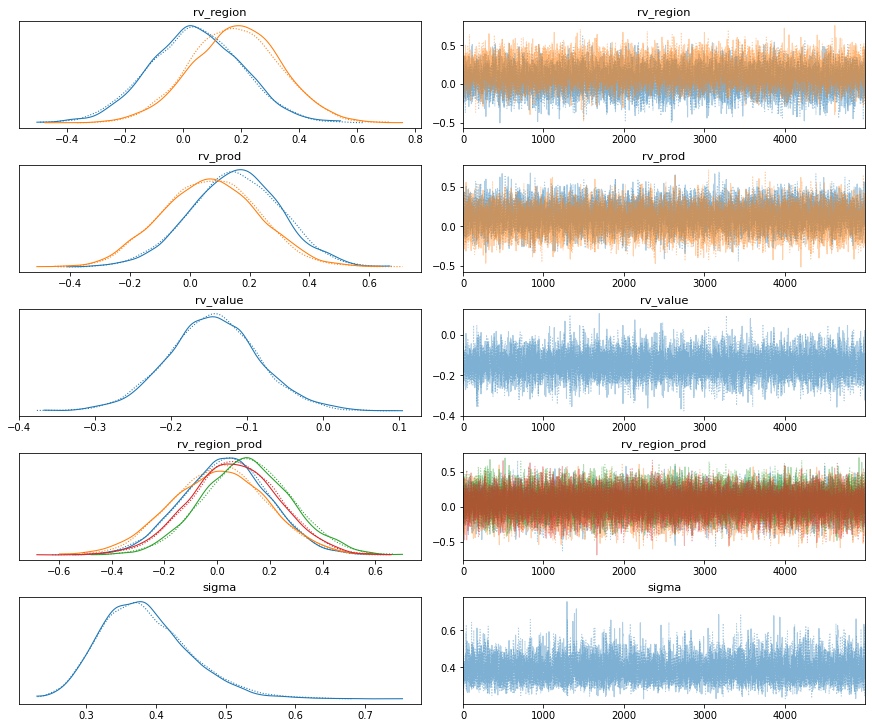

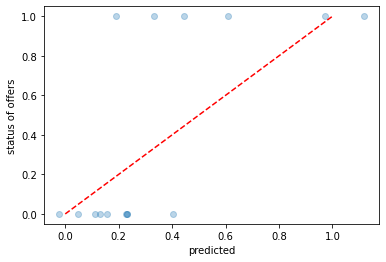

5 0.1304731368025399 -0.311918056958723


/opt/conda/lib/python3.7/site-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
rv_region[0],0.043,0.159,-0.265,0.333,0.002,0.002,9850.0,7556.0,1.0
rv_region[1],0.180,0.154,-0.114,0.464,0.001,0.001,12188.0,7753.0,1.0
rv_prod[0],0.152,0.151,-0.140,0.434,0.002,0.001,9978.0,8225.0,1.0
rv_prod[1],0.068,0.161,-0.228,0.363,0.002,0.001,11139.0,7654.0,1.0
rv_value,-0.145,0.061,-0.260,-0.031,0.001,0.000,14323.0,6882.0,1.0
"rv_region_prod[0,0]",0.033,0.164,-0.277,0.337,0.002,0.002,11221.0,7798.0,1.0
"rv_region_prod[0,1]",0.008,0.181,-0.325,0.355,0.002,0.002,12091.0,7219.0,1.0
"rv_region_prod[1,0]",0.113,0.167,-0.210,0.421,0.002,0.001,11304.0,7973.0,1.0
"rv_region_prod[1,1]",0.064,0.170,-0.257,0.382,0.002,0.002,10711.0,7628.0,1.0
sigma,0.385,0.065,0.272,0.508,0.001,0.000,9933.0,5914.0,1.0


In [8]:
# interaction terms for region and product
dim1 = len(set(region))
dim2 = len(set(product_id))

with pm.Model() as m6:
    rv_region = pm.Normal('rv_region', mu=0, sigma=0.2, shape=dim1)
    rv_prod = pm.Normal('rv_prod', mu=0, sigma=0.2, shape=dim2)
    rv_value = pm.Normal('rv_value', mu=0, sigma=0.2)   

    rv_region_prod = pm.Normal('rv_region_prod', mu=0, sigma=0.2, shape=(dim1, dim2))
    
    mu = rv_value * np.log(normalized_offers) +  rv_region[region] + rv_prod[product_id] + rv_region_prod[region, product_id]
    
    sigma = pm.HalfNormal('sigma', sigma=0.2)
    y = pm.Normal('y', mu=mu, sigma=sigma, observed=status)
    trace = pm.sample(tune=1000, draws=5000, chains=2)
    
az.plot_trace(trace) 
plt.show()

with m6:
    pp = pm.sample_posterior_predictive(trace)['y'].mean(axis=0)
    
plt.scatter(pp, status, alpha=0.3)
plt.xlabel('predicted')
plt.ylabel('status of offers')
plt.plot([0,1],[0,1], color='red', linestyle='dashed')
plt.show() 
print(i, mean_squared_error(pp, status), r2_score(pp, status))
i+=1 

pm.model_to_graphviz(m6)
az.summary(trace) 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.


/opt/conda/lib/python3.7/site-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


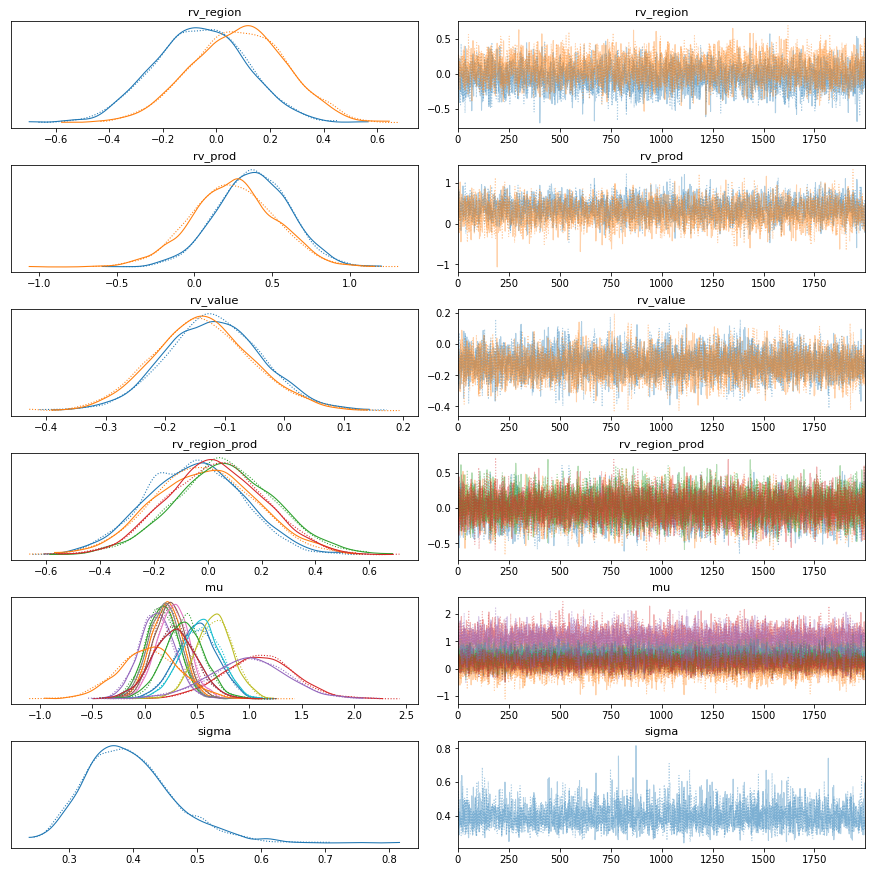

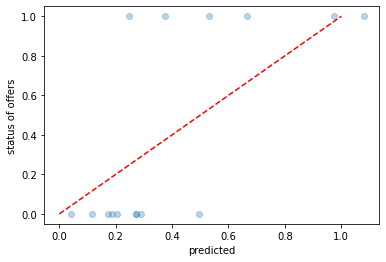

9 0.1264932720379458 -0.4643441105019184


/opt/conda/lib/python3.7/site-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
rv_region[0],-0.062,0.173,-0.384,0.256,0.003,0.002,3134.0,2871.0,1.0
rv_region[1],0.085,0.176,-0.225,0.433,0.003,0.003,3108.0,2887.0,1.0
rv_prod[0],0.378,0.232,-0.046,0.823,0.005,0.003,2631.0,2914.0,1.0
rv_prod[1],0.249,0.270,-0.257,0.744,0.005,0.004,2915.0,2905.0,1.0
rv_value[0],-0.120,0.082,-0.269,0.038,0.001,0.001,4286.0,2671.0,1.0
rv_value[1],-0.137,0.083,-0.290,0.027,0.001,0.001,5709.0,2893.0,1.0
"rv_region_prod[0,0]",-0.050,0.180,-0.402,0.272,0.003,0.003,3480.0,3028.0,1.0
"rv_region_prod[0,1]",-0.013,0.190,-0.366,0.342,0.003,0.003,5037.0,2853.0,1.0
"rv_region_prod[1,0]",0.063,0.187,-0.273,0.436,0.003,0.003,4375.0,3175.0,1.0
"rv_region_prod[1,1]",0.027,0.182,-0.299,0.369,0.003,0.003,3877.0,2962.0,1.0


In [13]:
# value term is divided per product
dim1 = len(set(region))
dim2 = len(set(product_id))

with pm.Model() as m7:
    rv_region = pm.Normal('rv_region', mu=0, sigma=0.2, shape=dim1)
    rv_prod = pm.Normal('rv_prod', mu=0, sigma=1, shape=dim2)
    rv_value = pm.Normal('rv_value', mu=0, sigma=0.2, shape=dim2)   

    rv_region_prod = pm.Normal('rv_region_prod', mu=0, sigma=0.2, shape=(dim1, dim2))
    
    offers_term = rv_prod[product_id] + rv_value[product_id]*np.log(normalized_offers)
    
    mu = pm.Deterministic('mu',offers_term +  rv_region[region] + rv_region_prod[region, product_id])
    
    sigma = pm.HalfNormal('sigma', sigma=0.2)
    y = pm.Normal('y', mu=mu, sigma=sigma, observed=status)
    trace = pm.sample(tune=1000, draws=2000, chains=2)
    #trace = az.InferenceData(tune=1000, draws=5000, chains=2, return_inferencedata=True)

az.plot_trace(trace) 
plt.show()

with m7:
    pp = pm.sample_posterior_predictive(trace)['y'].mean(axis=0)
    
plt.scatter(pp, status, alpha=0.3)
plt.xlabel('predicted')
plt.ylabel('status of offers')
plt.plot([0,1],[0,1], color='red', linestyle='dashed')
plt.show() 
print(i, mean_squared_error(pp, status), r2_score(pp, status))
i+=1 


pm.model_to_graphviz(m7)
plt.show()
az.summary(trace) 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.


/opt/conda/lib/python3.7/site-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


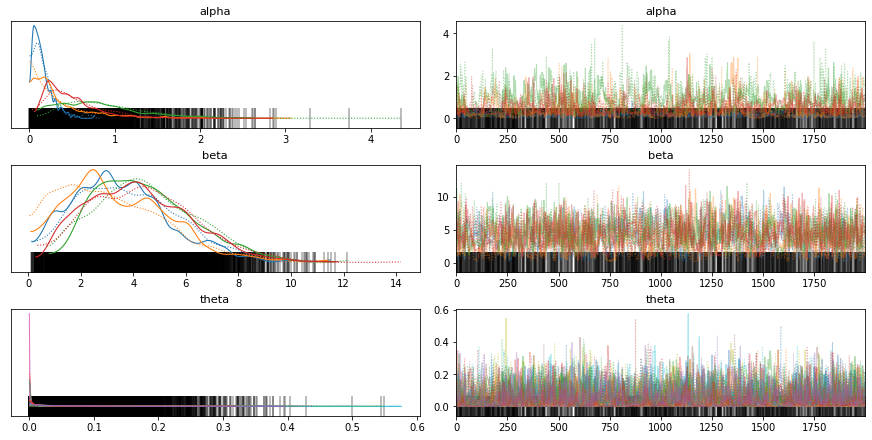

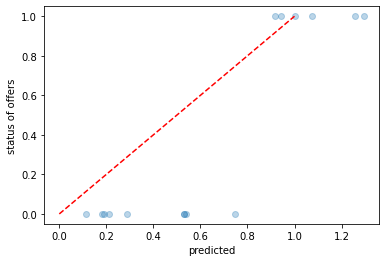

16 0.11894527083333334 0.23595892375273853


/opt/conda/lib/python3.7/site-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"alpha[0,0]",0.159,0.129,0.005,0.386,0.015,0.010,50.0,49.0,1.04
"alpha[0,1]",0.367,0.404,0.002,1.127,0.027,0.019,168.0,211.0,1.01
"alpha[1,0]",0.875,0.513,0.111,1.791,0.035,0.025,125.0,34.0,1.01
"alpha[1,1]",0.507,0.331,0.063,1.120,0.028,0.020,95.0,424.0,1.03
"beta[0,0]",3.688,1.919,0.280,7.077,0.143,0.102,163.0,511.0,1.01
"beta[0,1]",3.330,2.016,0.098,6.749,0.106,0.075,306.0,277.0,1.01
"beta[1,0]",4.485,1.889,1.284,8.030,0.095,0.067,371.0,473.0,1.00
"beta[1,1]",4.295,1.988,0.866,7.866,0.098,0.070,391.0,512.0,1.01
theta[0],0.050,0.052,0.000,0.144,0.002,0.002,93.0,16.0,1.03
theta[1],0.013,0.025,0.000,0.060,0.001,0.001,99.0,89.0,1.02


In [35]:
# y~binomial; theta(alpha, beta)
dim1 = len(set(region))
dim2 = len(set(product_id))

N=len(status) 

with pm.Model() as m8: 
    
    alpha = pm.HalfNormal('alpha', sigma=2, shape=(dim1,dim2)) 
    beta = pm.HalfNormal('beta', sigma=3, shape=(dim1,dim2))
    
    theta = pm.Beta("theta", alpha=alpha[region, product_id]*normalized_offers, beta=beta[region, product_id]*normalized_offers, shape=N)
    
    y = pm.Binomial('y',p=theta, observed=status, n=N) 
    
with m8:
    trace = pm.sample(tune=1000, draws=2000, chains=2)

az.plot_trace(trace) 
plt.show()

with m8:
    pp = pm.sample_posterior_predictive(trace)['y'].mean(axis=0)
    
plt.scatter(pp, status, alpha=0.3)
plt.xlabel('predicted')
plt.ylabel('status of offers')
plt.plot([0,1],[0,1], color='red', linestyle='dashed')
plt.show() 
print(i, mean_squared_error(pp, status), r2_score(pp, status))
i+=1 


az.summary(trace) 

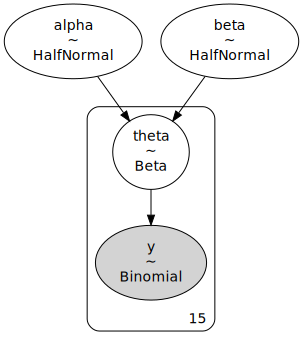

In [26]:

pm.model_to_graphviz(m8)

In [11]:
# p = scipy.special.expit(pp)

# plt.scatter(p, status, alpha=0.3)
# plt.xlabel('predicted')
# plt.ylabel('status of offers')
# plt.plot([0,1],[0,1], color='red', linestyle='dashed')
# plt.axvline(0.5)
# plt.show() 
